## Instruksi Umum:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

## Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Dataset Insurance - Medical Cost Personal
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Deskripsi Statistik:
       

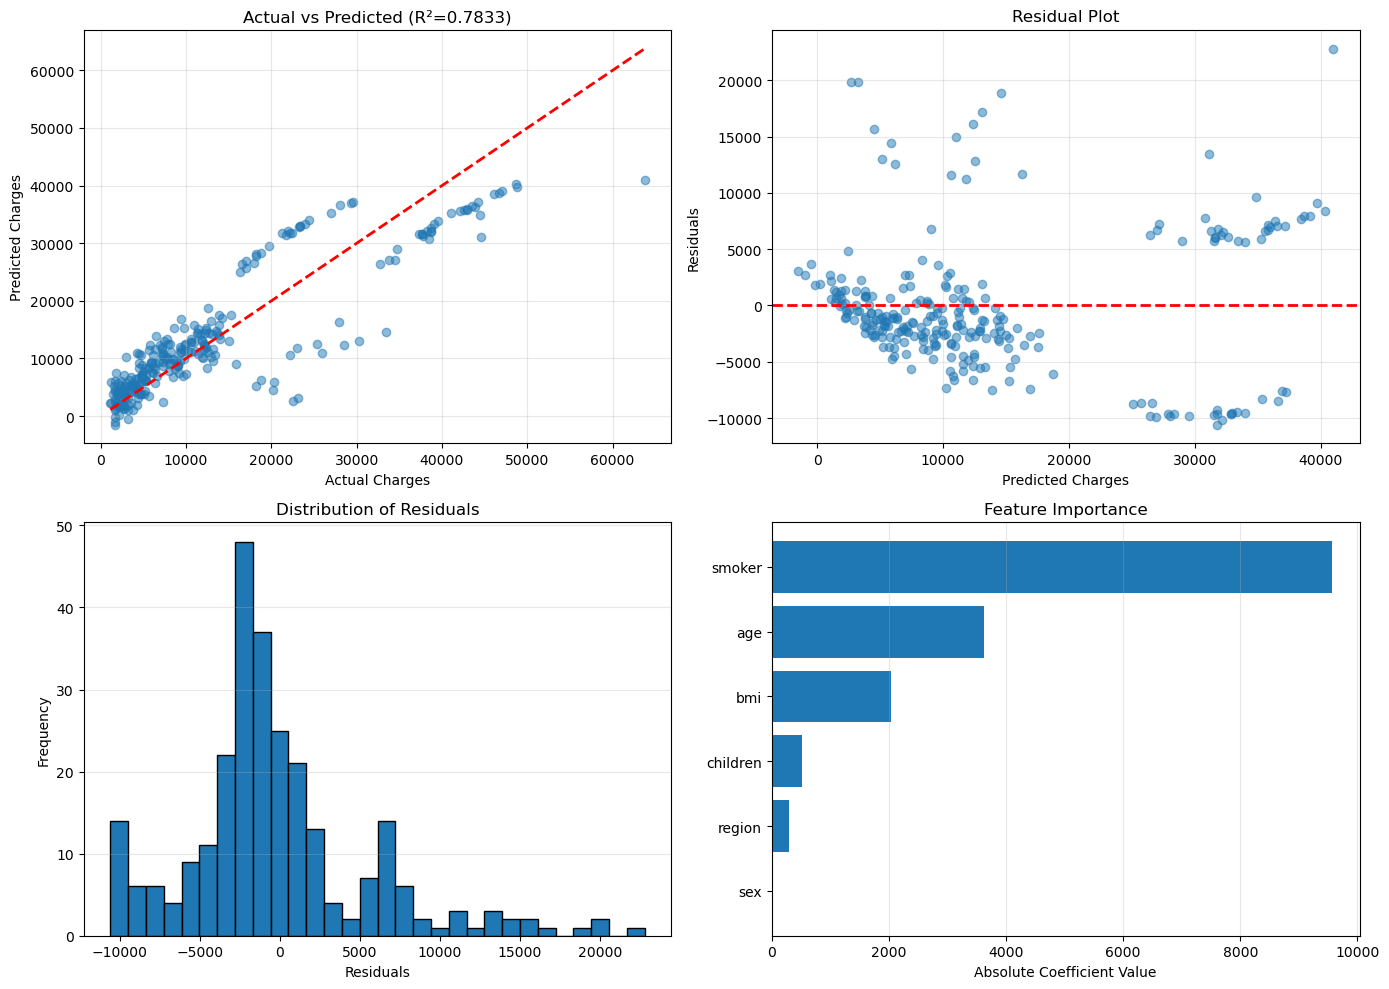


ANALISIS
Model memiliki R² = 0.7833, artinya model dapat menjelaskan 78.33%
variasi dalam biaya medis personal.

Rata-rata kesalahan prediksi (MAE) adalah $4,186.51
RMSE sebesar $5,799.59 menunjukkan deviasi standar dari kesalahan prediksi.


In [2]:
# Load dataset insurance.csv (Medical Cost Personal Dataset)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../Dataset/insurance.csv')
print("Dataset Insurance - Medical Cost Personal")
print("="*60)
print(df.head())
print("\nInformasi Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())

print("\n" + "="*60)
print("PREPROCESSING")
print("="*60)

# Encode categorical variables
print("\nEncoding categorical variables...")
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])
df['region_encoded'] = le_region.fit_transform(df['region'])

print(f"sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"smoker: {dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_)))}")
print(f"region: {dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))}")

# Prepare features and target
X = df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']]
y = df['charges']

print(f"\nShape X: {X.shape}")
print(f"Shape y: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n" + "="*60)
print("MULTIPLE LINEAR REGRESSION")
print("="*60)

# Buat dan train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("\nModel training selesai!")

# Prediksi
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print("\n" + "="*60)
print("EVALUASI MODEL")
print("="*60)

# Metrik evaluasi
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\nR-squared (Train): {r2_train:.4f}")
print(f"R-squared (Test): {r2_test:.4f}")
print(f"\nMean Squared Error (MSE): ${mse_test:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae_test:,.2f}")

# Koefisien model
print("\n" + "="*60)
print("KOEFISIEN MODEL")
print("="*60)
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for name, coef in zip(feature_names, model.coef_):
    print(f"{name:12s}: {coef:12.2f}")
print(f"{'Intercept':12s}: {model.intercept_:12.2f}")

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Charges')
axes[0, 0].set_ylabel('Predicted Charges')
axes[0, 0].set_title(f'Actual vs Predicted (R²={r2_test:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Charges')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=True)

axes[1, 1].barh(feature_importance['Feature'], feature_importance['Importance'])
axes[1, 1].set_xlabel('Absolute Coefficient Value')
axes[1, 1].set_title('Feature Importance')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ANALISIS")
print("="*60)
print(f"Model memiliki R² = {r2_test:.4f}, artinya model dapat menjelaskan {r2_test*100:.2f}%")
print(f"variasi dalam biaya medis personal.")
print(f"\nRata-rata kesalahan prediksi (MAE) adalah ${mae_test:,.2f}")
print(f"RMSE sebesar ${rmse_test:,.2f} menunjukkan deviasi standar dari kesalahan prediksi.")

## Catatan Tambahan:

- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.